In [24]:
## This notebook contains modularized code for our two-step approach
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans


In [21]:
# read in the data
data = pd.read_csv('~/Desktop/clean_collab.csv')[["bytes","pkts","dur","rate"]]
sample = data.sample(frac = 0.5, replace = False)

In [15]:
#### First step is to get anomaly scores from LOF/IForest, append to dataset.
# input a dataframe, an anomaly detection method.
# LOF, IForest, or nothing.
def approach(df, method):
    # first step is to generate a list of anomaly scores using chosen method.
    #if(method == "IForest"):
#         train = test_sample1_pages[['bytes','pkts','dur','rate']]
#         test = test_sample2_pages[['bytes','pkts','dur','rate']]
#         clf = IsolationForest(max_samples=1000, contamination=0.05,random_state= 5, bootstrap=False)
#         clf.fit(train)
    if(method == "LOF"):
        clf = LocalOutlierFactor(n_neighbors=20)
        y_pred = clf.fit_predict(df)
        df['LOF_label'] = y_pred
    return(df)

In [22]:
data_semi = approach(sample, "LOF")

In [43]:
#### Second step is to apply K-means clustering to the same dataset 
kmeans = KMeans(n_clusters=553, random_state=0).fit(sample)
result = kmeans.labels_
sample['cluster_label'] = result

In [41]:
len(sample[sample.cluster_label == 0]) /len(sample)

0.9813558824392965

In [36]:
len(sample[sample.cluster_label == 4])

53

In [37]:
len(sample[sample.cluster_label == 3])

8777

In [38]:
len(sample[sample.cluster_label == 1]) 

8

In [39]:
len(sample[sample.cluster_label == 2])

2592

In [ ]:
sample['cluster_label'].value_counts()

In [20]:
#### Third step is to make use of the result of step 1 & 2, to reduce misclassified normal instances(reduce false alarm).
## Two case here:
# case1: apply K-means once
# threshold is the maximum percentage of anomalies allowed in df
def normal_profiling(df, threshold):
    clusterID = list(range(553))
    df['normal_profile_labels'] = df['LOF_labels']
    while (len(df[df.normal_profile_labels == -1]) / len(df) >= threshold):
        # set anything that has label x, yet is classified by LOF to be an anomaly to be equal to 1. 
        df[df.cluster_label == x & df.normal_profile_labels == -1]['normal_profile_labels'] = 1
    return(df)
# case2: apply K-means repeatedly <-- not realistic because time-complexity

In [ ]:
#### Final step is to use majority vote to get final results.
def maj_vote(df):
    list = []
    df[df.normal_profile_labels == -1] # a df of all anomalies
    set(df.cluster_label) # need to know which clusters contain anomalies
    # do majority vote, and return a list of anomalous clusters
    for i in set(df.cluster_label):
        # for each of the clusters that contain anomalies
        proportion_anomaly = len(df[df.cluster_label == i & df.normal_profile_labels == -1]) / len(df[df.cluster_label == i])
        if proportion_anomaly > 0.5:
            list.extend([i])
    return(list)

In [ ]:
# run K-means clustering, and eliminate mis-classified normal instances using K-means clustering
    
# majority vote.
    
    
# return a df that contains all anomalies.

In [2]:
np.random.seed(42)


In [3]:
X = 0.3 * np.random.randn(100, 2)
X
len(X)

100

In [5]:
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [6]:
X = np.r_[X + 2, X - 2, X_outliers]
X
len(X)

220

In [6]:
# fit the model
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(data)

In [12]:
clf = IsolationForest(max_samples=1000, contamination=0.05,random_state= 5, bootstrap=False)
clf.fit(data)

IsolationForest(bootstrap=False, contamination=0.05, max_features=1.0,
        max_samples=1000, n_estimators=100, n_jobs=1, random_state=5,
        verbose=0)

In [10]:
sum(y_pred == 1)

1103512

In [11]:
sum(y_pred == -1)

122613

In [10]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

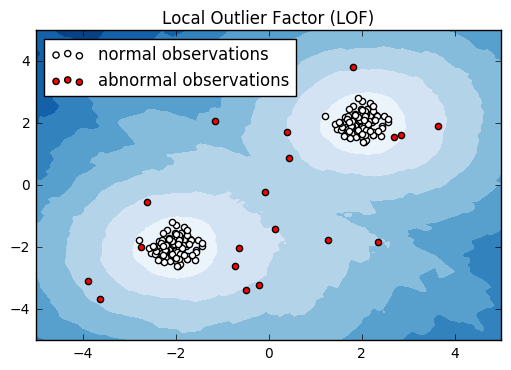

In [13]:


## plot the level sets of the decision function
# xx, yy = np.meshgrid(np.linspace(-5, 5,100), np.linspace(-5, 5, 100))
# Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# plt.title("Local Outlier Factor (LOF)")
# plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

# a = plt.scatter(X[:200, 0], X[:200, 1], c='white')
# b = plt.scatter(X[200:, 0], X[200:, 1], c='red')
# plt.axis('tight')
# plt.xlim((-5, 5))
# plt.ylim((-5, 5))
# plt.legend([a, b],
#            ["normal observations",
#             "abnormal observations"],
#            loc="upper left")
# plt.show()

'0.19.dev0'

In [45]:
sample.to_csv("~/Desktop/collab_clean_sample.csv")